In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

titanic = pd.read_csv("titanic_processado.csv")
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


In [37]:
X_treino,X_teste,y_treino,y_teste = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=0.3,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_treino,y_treino)

DecisionTreeClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


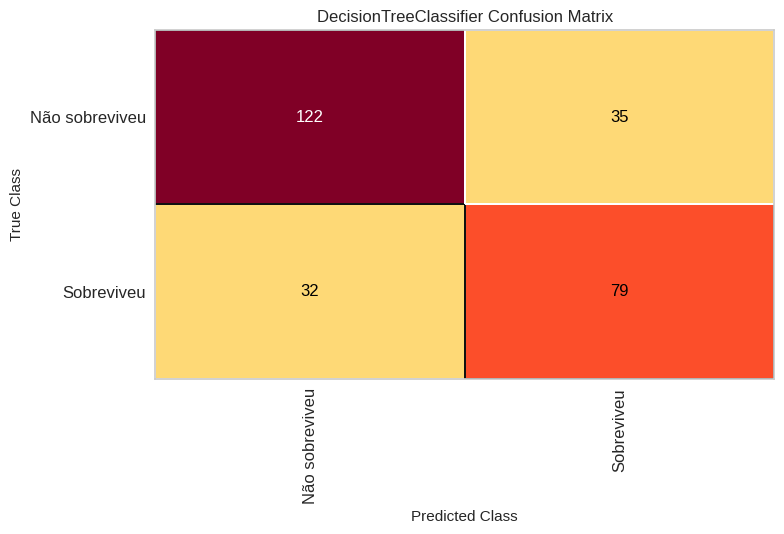

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
previsores = modelo.predict(X_teste)

cm = ConfusionMatrix(modelo, classes =["Não sobreviveu", "Sobreviveu"])
cm.score(X_teste,y_teste)
cm.show()

In [40]:
from sklearn.metrics import precision_score

y_previsao = modelo.predict(X_teste)
precisao = precision_score(y_teste, y_previsao)

In [41]:
precisao

0.6929824561403509

In [43]:
df = pd.read_csv("titanic_processado.csv")

In [44]:
X = df[["Sex", "Pclass"]]
y = df["Survived"]

In [45]:
from sklearn.model_selection import train_test_split

# Codificar apenas 'Sex' se 'Pclass' já estiver em formato numérico
X = pd.get_dummies(X, columns=["Sex"])

# Se 'Pclass' precisar de codificação, descomente a linha abaixo
# X = pd.get_dummies(X, columns=["Sex", "Pclass",])

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_treino,y_treino)

previsoes = modelo.predict(X_teste)

In [47]:
from sklearn.metrics import recall_score

recall = recall_score(y_teste,previsoes)
print("O valor do recall foi de: {:.2f}".format(recall))

O valor do recall foi de: 0.70


In [48]:
from sklearn.metrics import f1_score

f1= f1_score(y_teste,previsoes)

print(f"O valor do F1-Score é de: {f1}")

O valor do F1-Score é de: 0.7358490566037735


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


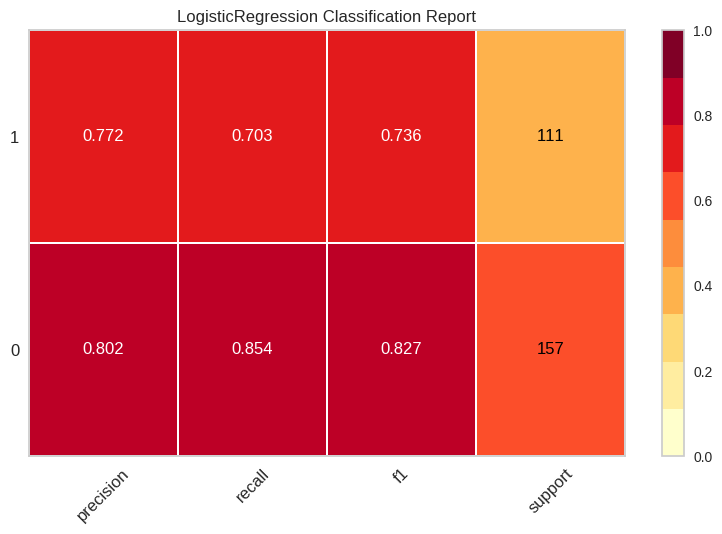

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [49]:
from yellowbrick.classifier import ClassificationReport

vis = ClassificationReport(modelo,support=True)
vis.fit(X_treino,y_treino)
vis.score(X_teste,y_teste)
vis.show()

In [50]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_teste,previsoes)

print("O resultado do AUC-ROC é de:", auc_roc)

O resultado do AUC-ROC é de: 0.7781029437080392


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


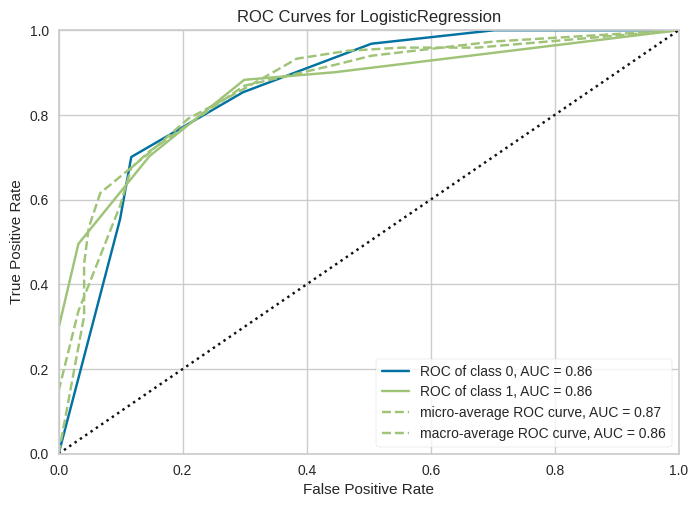

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
from yellowbrick.classifier import ROCAUC

visualizador = ROCAUC(modelo)

visualizador.fit(X_treino, y_treino)
visualizador.score(X_teste, y_teste)

visualizador.show()

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression

mercado = pd.read_csv("mercado.csv")

X = mercado[['renda']]
y = mercado['gasto']

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
predicoes = modelo.predict(X_teste)
rmse = mean_squared_error(y_teste, predicoes, squared=False)

print(f"RMSE: {rmse}")

RMSE: 0.37682278620094684


In [56]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste, predicoes)
print(f"MAE: {mae}")

MAE: 0.29711185284514924


In [57]:
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_teste, predicoes)
print(f"MAE: {mae}")

MAE: 0.29711185284514924


In [58]:
from sklearn.metrics import r2_score

r2 = r2_score(y_teste,predicoes)
print(f"O valor de r2:{r2}")

O valor de r2:0.4147771569478188
